Epoch 1/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.7961 - accuracy: 0.7706 - val_loss: 0.3872 - val_accuracy: 0.8895
Epoch 2/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.3598 - accuracy: 0.8987 - val_loss: 0.3229 - val_accuracy: 0.9061
Epoch 3/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.3122 - accuracy: 0.9105 - val_loss: 0.2868 - val_accuracy: 0.9161
Epoch 4/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2788 - accuracy: 0.9201 - val_loss: 0.2621 - val_accuracy: 0.9238
Epoch 5/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2526 - accuracy: 0.9276 - val_loss: 0.2372 - val_accuracy: 0.9287
Epoch 6/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2334 - accuracy: 0.9324 - val_loss: 0.2188 - val_accuracy: 0.9354
Epoch 7/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2191 - accuracy: 0.9365 - val_loss: 0.2037 - val_accuracy:

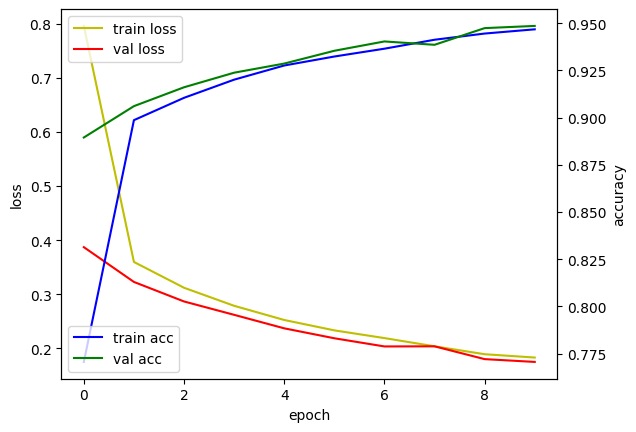

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# MNIST 데이터셋 가져오기 
(x_train, y_train), (x_test,y_test) = mnist.load_data()#load_data 함수를 사용해 학습데이터(60000개)와 테스트 데이터셋(10000)을 다운로드 후 넘파이 배열 형태로 가져온다
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 정규화 
# x_train에는 학습에 필요한 60000장의 숫자 이미지(28*28)데이터가 저장
# y_train에는 60000장의 숫자 이미지의 라벨링된 실제 숫자값이 저장
#픽셀값을 255로 나누어 0~1사이의 실수값으로 정규화해서 다시 넘파이 배열에 저장

# tf.data를 사용하여 데이터셋을 섞고 배치 만들기 
#학습에 필요한 데이터셋을 랜덤으로 섞은 후 학습용 
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
traub_size = int(len(x_train) * 0.7)  # 학습셋 : 검증셋 = 7:3
train_ds = ds.take(traub_size).batch(20) 
val_ds = ds.skip(traub_size).batch(20)
#60000개의 학습 데이터셋에서 70%는 실제 학습용 데이터셋으로 사용하고 
# 나머지 30%는 학습을 검증하는 검증용 데이터셋
# 배치사이즈는 학습시 샘플 수를 의미,작을수록 가중치 갱신이 자주 일어난다.,배치사이즈는 전체 학습 데이터 셋 이하여야 한다.


# MNIST 분류 모델 구성(순차모델)

model = Sequential()
model.add(Flatten(input_shape=(28,28))) #28 x 28 픽셀 이미지로 설정
model.add(Dense(20, activation='relu'))# Dense()를 사용해 출력크기가 20
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))#숫자 이미지를 판별해야 하는 값은 0~9이기 대문에 10으로 설정
#softmax는 입력받은 값을 출력으로 0~1사이의 값으로 정규화
#softmax는 출력값들의 총합이 항상 1이 되기 때문에 확률로 표현할 수 있다.

#모델 생성 
#모델의 출력값과 실제 정답의 오차를 계산하는 손실 함수로 sparse_categorical_crossentropy 사용
#오차를 보정하는 옵티마이저로는 SGD를 사용합니다.

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',
             metrics=['accuracy'])
#모델의 성능을 평가하는 데 사용하는 측정 항목은 accuracy 사용
#손실함수란 모델의 결과값과 실제 정답과의 오차를 계산하는 함수

# 모델 학습 
#fit() 함수를 사용 
#인자는 1.학습에 필요한 데이터셋 2.검증에 필요한 데이터 셋 3. 에포크값
hist = model.fit(train_ds, validation_data = val_ds, epochs=10)
#에포크란 학습 횟수를 의미


#모델 평가 
#evaluate()함수를 사용해 성능을 평가
#인자에는 테스트용 데이터셋
print('모델 평가')
model.evaluate(x_test, y_test)

#모델 정보 출력 
#모델의 정보를 출력 (계층 종류, 출력 형태)들을 보여준다
model.summary()

#모델 저장 
#학습이 완료된 모델을 h5파일로 저장
model.save('mnist_model.h5')

#학습 결과 그래프 그리기
#학습 히스토리 데이터를 그래프로 출력
#그래프에는 손실값(loss)과 학습정확도(accuracy)를 보여준다
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()


